In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import os

from pyPSFstack.pupils.sources import DipoleInterfaceSource
from pyPSFstack.pupils.windows import SEO
from pyPSFstack.core import PSFStack
from pyPSFstack.functions import trim_stack
from pyPSFstack.diversities.pola_diversities import PDiversity_QWP, \
    PDiversity_LP, PDiversity_Compound
from pyPSFstack.diversities.pupil_diversities import ZDiversity

In [54]:
fig_w = 16
psf_cmap = 'inferno'

def plot_alphastack(stack):
    v_max = np.max(stack)
    v_min = np.min(stack)

    n_z = stack.shape[-1]
    mid_ind = n_z//2
    fig, axs = plt.subplots(1,n_z,figsize=(fig_w,fig_w/n_z), gridspec_kw={'wspace':0.05, 'hspace':0})
    for ind in range(n_z):
        im = axs[ind].imshow(stack[...,ind],vmin=v_min,vmax=v_max,cmap=psf_cmap)
        axs[ind].set_axis_off()  

    cb_ax = fig.add_axes([0.91,0.13,0.01,0.75])
    fig.colorbar(im, cax=cb_ax)

fig_folder = os.path.join('figures','best_focus')

# Best focus due to spherical aberration

## Water/oil interface

In [55]:
numerical_aperture = 1.49
magnification = 100
ni = 1.33
nf = 1.515
cam_pixel_size = 6500
wavelength = 605
distance_coverslip = [wavelength/2,20*wavelength]

In [56]:
params = {}
params['pupil'] = {}
params['pupil']['aperture_size'] = numerical_aperture / nf
params['pupil']['computation_size'] = wavelength*magnification/(cam_pixel_size*nf)
params['pupil']['N_pts'] = 256*2

params['source'] = {}
params['source']['ni'] = ni
params['source']['nf'] = nf
params['source']['alpha'] = 0.

params['window'] = {}
params['window']['c'] = 1.5*np.pi#1.24*np.pi

wdw = SEO(**params['pupil'],**params['window'])
params['zdiversity'] = {}
# alpha_list = [1., 1.14135, 1.19068, 1.24211, 1.34421, 1.41355, 1.69152, 2.40854]
# water/oil
alpha_list = [1.41167, 1.39502, 1.27106, 1.23384, 1.20977, 1.19434, 1.1391 , 1.]
# air/oil
# alpha_list = [2.14297, 1.96151, 1.82928, 1.76728, 1.73516, 1.70888, 1.515, 1.]
params['zdiversity']['nf'] = nf

In [57]:
params['source']['delta'] = distance_coverslip[0]/wavelength
params['zdiversity']['z_list'] = -params['source']['delta']*np.array(alpha_list)
src1 = DipoleInterfaceSource(**params['pupil'],**params['source'])
zdiv1 = ZDiversity(**params['zdiversity'], **params['pupil'])
psfs1 = PSFStack([src1], zdiversity=zdiv1)
psfs1.compute_psf_stack(orientation=[0,0,0])

params['source']['delta'] = distance_coverslip[1]/wavelength
params['zdiversity']['z_list'] = -params['source']['delta']*np.array(alpha_list)
src2 = DipoleInterfaceSource(**params['pupil'],**params['source'])
zdiv2 = ZDiversity(**params['zdiversity'], **params['pupil'])
psfs2= PSFStack([src2], zdiversity=zdiv2)
psfs2.compute_psf_stack(orientation=[0,0,0])

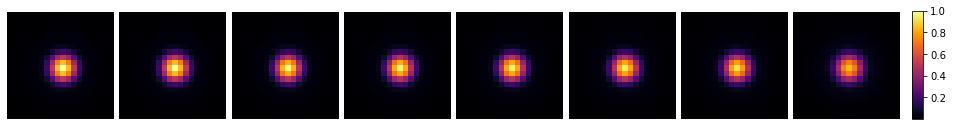

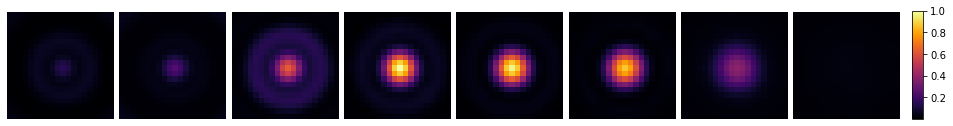

In [58]:
n_trim = 20
stack1 = trim_stack(psfs1.psf_stack, n_trim)
stack1 /= np.max(stack1)
stack2 = trim_stack(psfs2.psf_stack, n_trim)
stack2 /= np.max(stack2)
plot_alphastack(stack1)
plot_alphastack(stack2)
plt.savefig(os.path.join(fig_folder, 'best_focus_water.pdf'), bbox_inches='tight')

In [43]:
params['source']['delta'] = distance_coverslip[0]/wavelength
params['zdiversity']['z_list'] = -params['source']['delta']*np.array(alpha_list)
src1 = DipoleInterfaceSource(**params['pupil'],**params['source'])
zdiv1 = ZDiversity(**params['zdiversity'], **params['pupil'])
psfs1 = PSFStack([src1,wdw], zdiversity=zdiv1)
psfs1.compute_psf_stack(orientation=[0,0,0])
params['source']['delta'] = distance_coverslip[1]/wavelength
params['zdiversity']['z_list'] = -params['source']['delta']*np.array(alpha_list)
src2 = DipoleInterfaceSource(**params['pupil'],**params['source'])
zdiv2 = ZDiversity(**params['zdiversity'], **params['pupil'])
psfs2= PSFStack([src2,wdw], zdiversity=zdiv2)
psfs2.compute_psf_stack(orientation=[0,0,0])

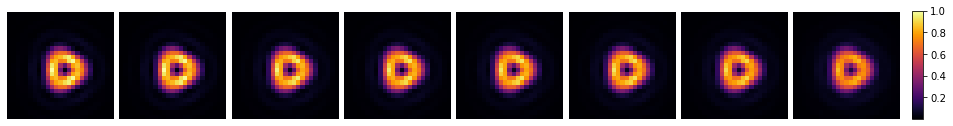

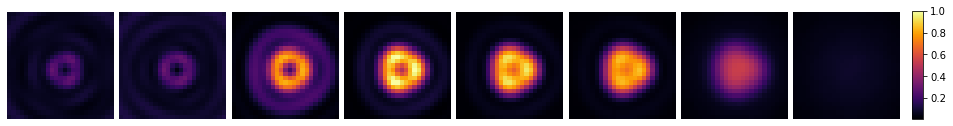

In [44]:
n_trim = 25
stack1 = trim_stack(psfs1.psf_stack, n_trim)
stack1 /= np.max(stack1)
stack2 = trim_stack(psfs2.psf_stack, n_trim)
stack2 /= np.max(stack2)
plot_alphastack(stack1)
plot_alphastack(stack2)

## Air/oil interface

In [59]:
numerical_aperture = 1.49
magnification = 100
ni = 1
nf = 1.515
cam_pixel_size = 6500
wavelength = 605
distance_coverslip = [wavelength/2,20*wavelength]

In [60]:
params = {}
params['pupil'] = {}
params['pupil']['aperture_size'] = numerical_aperture / nf
params['pupil']['computation_size'] = wavelength*magnification/(cam_pixel_size*nf)
params['pupil']['N_pts'] = 256*2

params['source'] = {}
params['source']['ni'] = ni
params['source']['nf'] = nf
params['source']['alpha'] = 0.

params['window'] = {}
params['window']['c'] = 1.5*np.pi#1.24*np.pi

wdw = SEO(**params['pupil'],**params['window'])
params['zdiversity'] = {}
# air/oil
alpha_list = [2.14297, 1.96151, 1.82928, 1.76728, 1.73516, 1.70888, 1.515, 1.]
params['zdiversity']['nf'] = nf

In [61]:
params['source']['delta'] = distance_coverslip[0]/wavelength
params['zdiversity']['z_list'] = -params['source']['delta']*np.array(alpha_list)
src1 = DipoleInterfaceSource(**params['pupil'],**params['source'])
zdiv1 = ZDiversity(**params['zdiversity'], **params['pupil'])
psfs1 = PSFStack([src1], zdiversity=zdiv1)
psfs1.compute_psf_stack(orientation=[0,0,0])

params['source']['delta'] = distance_coverslip[1]/wavelength
params['zdiversity']['z_list'] = -params['source']['delta']*np.array(alpha_list)
src2 = DipoleInterfaceSource(**params['pupil'],**params['source'])
zdiv2 = ZDiversity(**params['zdiversity'], **params['pupil'])
psfs2= PSFStack([src2], zdiversity=zdiv2)
psfs2.compute_psf_stack(orientation=[0,0,0])

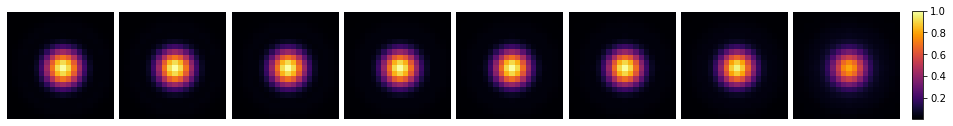

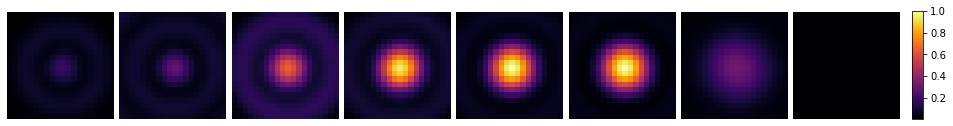

In [62]:
n_trim = 20
stack1 = trim_stack(psfs1.psf_stack, n_trim)
stack1 /= np.max(stack1)
stack2 = trim_stack(psfs2.psf_stack, n_trim)
stack2 /= np.max(stack2)
plot_alphastack(stack1)
plot_alphastack(stack2)
plt.savefig(os.path.join(fig_folder, 'best_focus_air.pdf'), bbox_inches='tight')

In [49]:
alpha_list

[2.14297, 1.96151, 1.82928, 1.76728, 1.73516, 1.70888, 1.515, 1.0]

In [50]:
params['source']['delta'] = distance_coverslip[0]/wavelength
params['zdiversity']['z_list'] = -params['source']['delta']*np.array(alpha_list)
src1 = DipoleInterfaceSource(**params['pupil'],**params['source'])
zdiv1 = ZDiversity(**params['zdiversity'], **params['pupil'])
psfs1 = PSFStack([src1,wdw], zdiversity=zdiv1)
psfs1.compute_psf_stack(orientation=[0,0,0])
params['source']['delta'] = distance_coverslip[1]/wavelength
params['zdiversity']['z_list'] = -params['source']['delta']*np.array(alpha_list)
src2 = DipoleInterfaceSource(**params['pupil'],**params['source'])
zdiv2 = ZDiversity(**params['zdiversity'], **params['pupil'])
psfs2= PSFStack([src2,wdw], zdiversity=zdiv2)
psfs2.compute_psf_stack(orientation=[0,0,0])

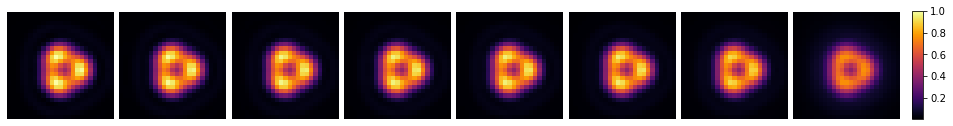

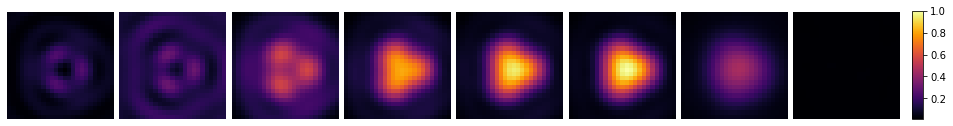

In [51]:
n_trim = 25
stack1 = trim_stack(psfs1.psf_stack, n_trim)
stack1 /= np.max(stack1)
stack2 = trim_stack(psfs2.psf_stack, n_trim)
stack2 /= np.max(stack2)
plot_alphastack(stack1)
plot_alphastack(stack2)